In [ ]:
import imbed

# Label data

In [2]:
from imbed.tools import ClusterLabeler

In [ ]:
from imbed_data_prep.eurovis import EurovisDacc

dacc = EurovisDacc()

In [4]:
dacc.merged_artifacts.iloc[0]

conference                                                      EuroVis
year                                                               2024
title                 A Prediction-Traversal Approach for Compressin...
abstract              We explore an error-bounded lossy compression ...
authorNamesDeduped           Congrong Ren;Xin Liang 0001;Hanqi Guo 0001
award                                                              None
resources                                                             P
link                     https://vispubs.com/?paper=10.1111%2Fcgf.15097
segment               ##A Prediction-Traversal Approach for Compress...
n_tokens                                                            318
x                                                            -29.573154
y                                                             -3.688721
cluster_05                                                            3
cluster_08                                                      

In [29]:
cluster_labels = ClusterLabeler(cluster_idx_col='cluster_13').label_clusters(dacc.merged_artifacts)

from pprint import pprint

pprint(cluster_labels)


{0: '"Summaries of Data Visualization Publications"',
 1: '"Data Visualization Academic Papers"',
 2: '"Visual Analytics Research Papers Abstracts"',
 3: '"Abstracts of Visualization Studies"',
 4: '"Data Visualization Research Abstracts"',
 5: 'Dataset of Visualization Research Titles',
 6: '"Visual Data Analysis Research Articles"',
 7: '"Academic Research Data Summaries"',
 8: '"Academic Papers on Data Visualization"',
 9: '"Scientific Data Visualization Abstracts"',
 10: '"Titles of Scientific Research Papers"',
 11: '"Research Papers on Data Visualization"',
 12: '"Visual Analytics Research Abstracts"'}


In [5]:
context = """
    These are all research papers for data visualization. The labels should convey the 
    particular topic or domain of the papers beyond the general topic of data visualization.
"""
cluster_labels = ClusterLabeler(cluster_idx_col='cluster_13', context=context)._label_clusters(dacc.merged_artifacts)


In [6]:
next(cluster_labels())

(2,
 "1. Graph Customization Techniques\n2. Visualizing Multivariate Networks\n3. Aneurysm Detection and Segmentation\n4. Visualizing Animal Behavior Patterns\n5. Evolutionary Visual Exploration Evaluation\n6. Blood-Flow Visualization Techniques\n7. Analyzing Nano-brain Structures\n8. Edge and Trail Bundling Techniques\n9. Visual Analysis of Particle Separation\n10. Pie & Donut Chart Encodings\n11. Reordering Strategies in Data Clusters\n12. Transparent Particle-based Data Visualization\n13. AR Studies through Visual Gaze\n14. Scaling Pan/Zoom Visualizations\n15. Spatio-Temporal Weather Data Visualization\n16. Morse Complexes on Tetrahedral Meshes\n17. Visualizing Missing Data Treatments\n18. Analyzing Autonomous Vehicle Logs\n19. Streamgraph Aesthetics and Applications\n20. Visualizing Global Trade Networks\n21. Visualizing Dynamic Physicalization Effects\n22. Correlation-Based Time Series Analysis\n23. Data Visualization in Water Stories\n24. Mouse Interactions in Data Analysis\n25. 

# Describe data

Here we see how we can use the oa.prompt_function to make a python function that will describe the data you give it.

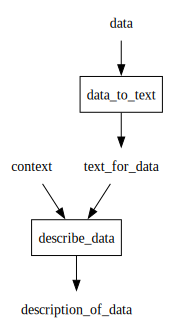

In [2]:
from meshed import code_to_dag

@code_to_dag
def cluster_description():
    text_for_data = data_to_text(data)
    description_of_data = describe_data(text_for_data, context)

cluster_description.dot_digraph()

In [7]:
import oa

describe_data = oa.prompt_function("""
Describe the data I printed below. 
Have the description be around {n_words:10} words long.
More info about the source of the data: {context: }.
                                   
The data:
                                   
{data}
""")



# note that describe_data is a python function with arguments, defaults, etc.
describe_data


<function oa.tools.prompt_function.<locals>.ask_oa(data, *, n_words='10', context=' ')>

Let's try this out with the github repo data.

In [6]:
from imbed_data_prep.github_repos import *

d = GithubReposData()

In [9]:
def indices_of_first_rows(df, n_rows=20):
    """A data_to_text function that returns the indices of the first n_rows of a dataframe."""
    t = df.iloc[:n_rows]
    return '\n'.join(t.index.values)

print(indices_of_first_rows(d.raw_data))

xdedzl/RuntimeTerrainEditor
realvect0r/leetcode-api
vippsas/vipps-developers
NetManAIOps/Squeeze
mdolab/MACH-Aero
daily-co/daily-js
NREL/ReEDS-2.0
gadenbuie/grkstyle
guanpj/JReadHub
exp-sky/AsiaSecWest-2018-Chakra-vulnerability-and-exploit-bypass-all-system-mitigation
dukelec/cdpga
pjgao/eplot
dalenguyen/firebase-functions-helper
enovella/ida2ghidra-kb
JazzyWagdaddy/AzureStudyGroups-AZ-203
simonwongwong/Facebook-Messenger-Statistics
uber/simple-store
al-one/certbot-auth-dnspod
digitalbitbox/bitbox-base
BillyWei01/Doodle


In [10]:
data_context = describe_data(indices_of_first_rows(d.raw_data))
data_context

'These are different repositories found on the coding platform, Github.'

Let's now select a subset of the data taken from a cluster, and feed our function the descriptions of it.

In [4]:
# get the smallest cluster
from collections import Counter
dflt_cluster_idx, num_of_rows = Counter(d.cluster_indices.clusters_34).most_common()[-1]
dflt_cluster_idx, num_of_rows

In [5]:
def descriptions_of_cluster(
    d, *, cluster_idx=dflt_cluster_idx, max_description_length=100, n_samples=500,
):
    """A data_to_text function that returns the descriptions of a cluster"""
    import numpy as np

    indices = d.cluster_indices[d.cluster_indices.clusters_34 == cluster_idx].index
    random_sample_of_indices = np.random.choice(indices, n_samples)
    sample_indices = d.raw_data.loc[random_sample_of_indices, 'description'].values
    descriptions_text = '\n\n'.join(
        map(lambda x: x[:max_description_length] + '...', filter(None, sample_indices))
    )
    return descriptions_text

In [21]:
descriptions_text = descriptions_of_cluster(d)
print(f"{len(descriptions_text)} characters")

26904 characters


In [18]:
# should be something about go language
print(describe_data(descriptions_text))

The data lists numerous GoLang projects or tools with brief descriptions of their functionalities.


In [23]:
# Confirmation that these are go language repos
key_text = 'go'
idx = d.cluster_indices[d.cluster_indices.clusters_34 == dflt_cluster_idx].index
r = sum(key_text in x.lower() for x in d.raw_data.loc[idx, 'languages'].values) / len(idx)
print(f"{r * 100:.2f}% of the repos in cluster mention {key_text} in their langauges.")

84.04% of the repos in cluster mention go in their langauges.


In [24]:
# try with another cluster
print(describe_data(descriptions_of_cluster(d, cluster_idx=0)))

These are descriptions of different coding projects and software plugins.


In [25]:
# again
print(describe_data(descriptions_of_cluster(d, cluster_idx=0)))

The data consists of various software project descriptions, often including technologies used and project functionality.
